[Deep LEarning with Python, Keras Tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k)

In [7]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train, epochs=3)

2.1.0
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2555 - accuracy: 0.9254
Epoch 2/3
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1043 - accuracy: 0.9678
Epoch 3/3
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0719 - accuracy: 0.9773


In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.0956 - accuracy: 0.9693
0.0956290719728917 0.9693


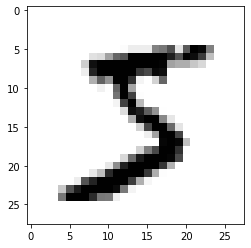

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

## Deeplizard

In [11]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [12]:
train_labels = []
train_samples = []

#shuffle
#normalize 0-1

In [14]:
model = Sequential([
    Dense(units=16, input_shape(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])


SyntaxError: positional argument follows keyword argument (<ipython-input-14-913eec3c799e>, line 2)

## Studienarbeit

Daten sollen in x_train-Datenstruktur eingelesen werden. Diese soll als Spalten die x,y und z-Koordinaten des rechten Handgelenks zu den ersten 150 Zeitpunkten und als Zeilen alle Datensätze haben.
=> 450 Spalten

y_train ist die Endposition der Bewegung (mit x, y und z-Koordinate)
=> 3 Spalten

10% der Daten werden als Testdaten verwendet

[regression based neural network](https://towardsdatascience.com/regression-based-neural-networks-with-tensorflow-v2-0-predicting-average-daily-rates-e20fffa7ac9a)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

LIMIT = 150

inputs = keras.Input(shape=(3*LIMIT,))

x = layers.Dense(64, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(3, activation="linear")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

In [13]:
import os, sys, pandas as pd, numpy as np, tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy.random import seed
from numpy import mean, std
seed(1)
tf.random.set_seed(1)
from tensorflow import keras
from tensorflow.python.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

LIMIT = 80

x_train = np.empty([0,3*LIMIT])
x_test = np.empty([0,3*LIMIT])
y_train = np.empty([0,3])
y_test = np.empty([0,3])


for file in os.listdir('../DATA/5_filtered'):
    if file.find("R") != -1:
        df = pd.read_csv('../DATA/5_filtered/'+file, sep = ';').iloc[:,[0,1,2]]
        if len(df) >=LIMIT+20:
            x_row = df.iloc[0:LIMIT].values.flatten()
            y_row = df.iloc[-1].values.flatten()
            x_train = np.vstack([x_train, x_row])
            y_train = np.vstack([y_train, y_row])

#x_train = tf.keras.utils.normalize(x_train, axis=1)
#numberOfTestSamples = round(x_train.shape[0] * 0.1)

X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1)

#y_train=np.reshape(y_train, (-1,1))
#y_val=np.reshape(y_val, (-1,1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

xtrain_scale=scaler_x.fit_transform(X_train)
xtest_scale=scaler_x.fit_transform(X_test)
ytrain_scale=scaler_y.fit_transform(y_train)
ytest_scale=scaler_y.fit_transform(y_test)

#x_test = x_train[-numberOfTestSamples:,:]
#x_train = x_train[:-numberOfTestSamples,:]
#y_test = y_train[-numberOfTestSamples:,:]
#y_train = y_train[:-numberOfTestSamples,:] 

inputs = keras.Input(shape=(3*LIMIT,))

x = layers.Dense(3*LIMIT, input_dim=3*LIMIT, activation="relu")(inputs)
x = layers.Dense(3*LIMIT*(3*LIMIT+3), activation="relu")(x)
outputs = layers.Dense(3, activation="linear")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="hand_prediction")
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','accuracy'])

history = model.fit(xtrain_scale,ytrain_scale, epochs=150, batch_size=10, verbose=0, validation_split=0.1)
predictions = model.predict(xtest_scale)

score = model.evaluate(xtest_scale, ytest_scale, verbose=0)

print('mse test: ', score[1], '    training: ', mean(history.history['mse']))
print('mae test: ', score[2], '    training: ', mean(history.history['mae']))
print('accuracy test: ', score[3], '    training: ', mean(history.history['accuracy']))

#val_loss, val_acc = model.evaluate(xtest_scale, ytest_scale)
#print(val_loss, val_acc)

Model: "hand_prediction"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 240)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 240)               57840     
_________________________________________________________________
dense_25 (Dense)             (None, 58320)             14055120  
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 174963    
Total params: 14,287,923
Trainable params: 14,287,923
Non-trainable params: 0
_________________________________________________________________
mse test:  0.046936378     training:  0.025767071
mae test:  0.15862021     training:  0.11245617
accuracy test:  0.6744186     training:  0.7159578


## Ergebnisvisualisierung
### Entwicklung der Metriken über Epochen hinweg

dict_keys(['loss', 'mse', 'mae', 'accuracy', 'val_loss', 'val_mse', 'val_mae', 'val_accuracy'])


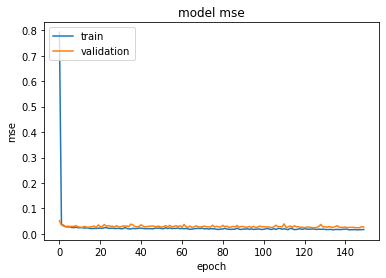

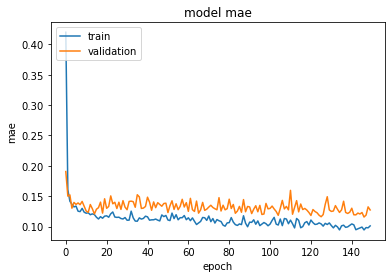

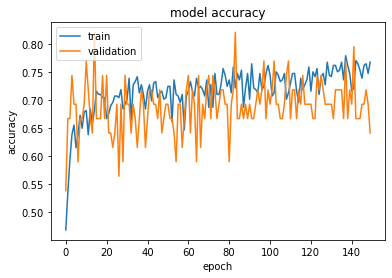

In [45]:
import math
import matplotlib.pyplot as plt

for metric in ['mse', 'mae', 'accuracy']:
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric])
    plt.title('model '+metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

predictions = scaler_y.inverse_transform(predictions)
y_test = scaler_y.inverse_transform(ytest_scale)

#print(predictions[0])
#print(y_test[0])


### Visualisierung des Testdatensatzes

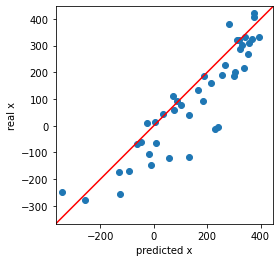

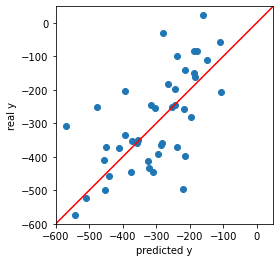

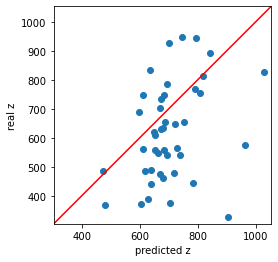

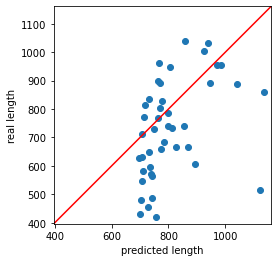

In [55]:
import math

x = xtest_scale #xtrain_scale
y = y_test      #y_train

predictions = scaler_y.inverse_transform(model.predict(x))

predicted_length = list()
real_length = list()

for val in predictions:
    predicted_length.append(math.sqrt(val[0]**2 + val[1]**2 + val[2]**2))
for val in y:
    real_length.append(math.sqrt(val[0]**2 + val[1]**2 + val[2]**2))
                                       
for i in range(4):
    if i == 3:
        predicted_data = predicted_length
        real_data = real_length
    else:
        predicted_data = [item[i] for item in predictions]
        real_data = [item[i] for item in y]

    min_value = min(min(predicted_data), min(real_data)) - 25
    max_value = max(max(predicted_data), max(real_data)) + 25

    plt.figure()
    plt.scatter(predicted_data,real_data)
    
    if i == 0:
        coord = 'x'
    elif i == 1:
        coord = 'y'
    elif i == 2:
        coord = 'z'
    elif i == 3: 
        coord = 'length'
    plt.ylabel('real '+coord)
    plt.xlabel('predicted '+coord)
    plt.xlim(min_value, max_value)
    plt.ylim(min_value, max_value)
    plt.gca().set_aspect('equal')
    plt.plot([min_value,max_value],[min_value,max_value], color = 'r')
    plt.show()

## K-fache Kreuzvalidierung
[Quelle](https://machinelearningmastery.com/deep-learning-models-for-multi-output-regression/)
Realitätsnäher als einfache Teststrategie mit statischem Testdatensatz

In [12]:
import os, sys, pandas as pd, numpy as np, tensorflow as tf
from numpy import mean, std
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy.random import seed
seed(1)
tf.random.set_seed(1)
from tensorflow import keras
from tensorflow.python.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold

LIMIT = 80

X = np.empty([0,3*LIMIT])
y = np.empty([0,3])

for file in os.listdir('../DATA/5_filtered'):
    if file.find("R") != -1:
        df = pd.read_csv('../DATA/5_filtered/'+file, sep = ';').iloc[:,[0,1,2]]
        if len(df) >=LIMIT+20:
            x_row = df.iloc[0:LIMIT].values.flatten()
            y_row = df.iloc[-1].values.flatten()
            X = np.vstack([X, x_row])
            y = np.vstack([y, y_row])

#k-fold cross-validation
results = list()
n_inputs, n_outputs = X.shape[1], y.shape[1]
cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)

for train_ix, test_ix in cv.split(X):
    X_train, X_test = X[train_ix], X[test_ix]
    y_train, y_test = y[train_ix], y[test_ix]
    
    #normalize values
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    xtrain_scale=scaler_x.fit_transform(X_train)
    xtest_scale=scaler_x.fit_transform(X_test)
    ytrain_scale=scaler_y.fit_transform(y_train)
    ytest_scale=scaler_y.fit_transform(y_test)
    
    #define model
    inputs = keras.Input(shape=(3*LIMIT,))
    x = layers.Dense(3*LIMIT, input_dim=3*LIMIT, activation="relu")(inputs)
    x = layers.Dense(3*LIMIT*(3*LIMIT+3), activation="relu")(x)
    outputs = layers.Dense(3, activation="linear")(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="hand_prediction")
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','accuracy'])
    
    #fit model
    history = model.fit(xtrain_scale,ytrain_scale, epochs=200, verbose=0)
    predictions = model.predict(xtest_scale)
    
    #evaluate mode on test set
    score = model.evaluate(xtest_scale, ytest_scale, verbose=0)
    results.append(score)
    print('----------------------------------------')
    print('Test mse:', round(score[1],3))
    print('Test mae:', round(score[2],3))
    print('Test accuracy:', round(score[3],3))
    
print('=========================================')

mse = [item[1] for item in results]
mae = [item[2] for item in results]
accuracy = [item[3] for item in results]
print("mse: "+str(mean(mse))+" (std: "+str(std(mse))+")")
print("mae: "+str(mean(mae))+" (std: "+str(std(mae))+")")
print("accuracy: "+str(mean(accuracy))+" (std: "+str(std(accuracy))+")")

----------------------------------------
Test mse: 0.057
Test mae: 0.184
Test accuracy: 0.558
----------------------------------------
Test mse: 0.156
Test mae: 0.303
Test accuracy: 0.326
----------------------------------------
Test mse: 0.101
Test mae: 0.256
Test accuracy: 0.349
----------------------------------------
Test mse: 0.085
Test mae: 0.227
Test accuracy: 0.488
----------------------------------------
Test mse: 0.112
Test mae: 0.252
Test accuracy: 0.419
----------------------------------------
Test mse: 0.086
Test mae: 0.22
Test accuracy: 0.419
----------------------------------------
Test mse: 0.081
Test mae: 0.22
Test accuracy: 0.605
----------------------------------------
Test mse: 0.072
Test mae: 0.218
Test accuracy: 0.488
----------------------------------------
Test mse: 0.071
Test mae: 0.21
Test accuracy: 0.465
----------------------------------------
Test mse: 0.114
Test mae: 0.277
Test accuracy: 0.512
----------------------------------------
Test mse: 0.085
Test m